<a href="https://colab.research.google.com/github/navarro1113/Assigment/blob/main/Brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de la clase Inteligencia Artificial y Redes Neuronales.
## Introducción
Este proyecto consiste en el entrenamiento de takjsd Se generó un conjunto de datos

## Librerías
La primera parte consiste en importar librerías.

In [ ]:
# importar librerías
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import cv2
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
# Rutas a las carpetas de entrenamiento y prueba
train_data_dir = '/content/drive/MyDrive/IA/archive/Training'
test_data_dir = '/content/drive/MyDrive/IA/archive/Testing'

In [ ]:
# Función para cargar y redimensionar una imagen
def load_and_preprocess_image(image_path, target_size=(250, 250)): #Original son aprox 500
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Lee la imagen en escala de grises
    img = cv2.resize(img, target_size)  # Redimensiona la imagen al tamaño deseado
    img = img_to_array(img)  # Convierte la imagen a un array
    return img

In [ ]:
# Crear listas para almacenar imágenes y etiquetas
train_images = []
train_labels = []
test_images = []
test_labels = []

## Preprocesamiento
En esta sección se importan las imágenes, se reescalan y se dividen en grupo de entrenamiento y grupo de validación.

Explicación de la división del conjunto de imágenes (80-20 o 70-30).

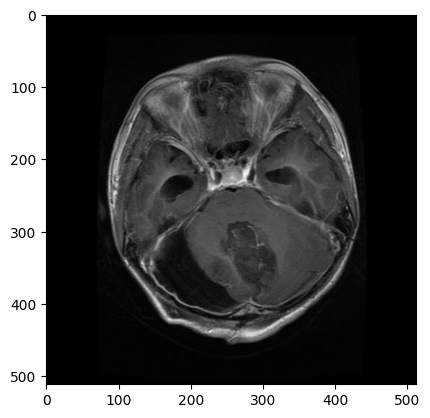

In [ ]:
# Cargar imagen de prueba en escala de grises
file = '/content/drive/MyDrive/IA/archive/Testing/glioma/Te-glTr_0000.jpg'
test_image_gray = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

# Preview de la imagen de prueba en escala de grises
plt.imshow(test_image_gray, cmap='gray')
# plt.axis('off')  # Para deshabilitar los ejes si se desea
plt.show()

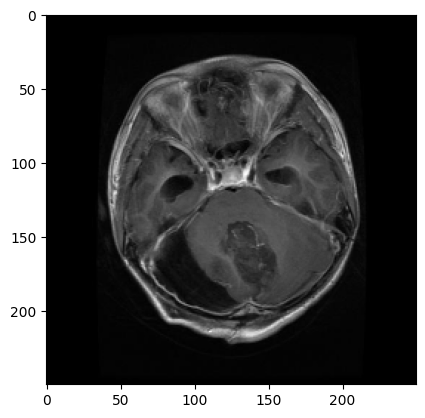

In [ ]:
# Cargar imagen de prueba en escala de grises
file = '/content/drive/MyDrive/IA/archive/Testing/glioma/Te-glTr_0000.jpg'
test_image_gray = cv2.imread(file, cv2.IMREAD_GRAYSCALE)



# Redimensionar la imagen a un nuevo tamaño (por ejemplo, 300x300)
new_width = 250
new_height = 250
resized_image = cv2.resize(test_image_gray, (new_width, new_height))

# Convertir de BGR a RGB (OpenCV carga la imagen en formato BGR)
# resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

# Preview de la imagen redimensionada en color
plt.imshow(resized_image, cmap='gray')
# plt.axis('off')  # Para deshabilitar los ejes si se desea
plt.show()

In [ ]:
# Rutas a las carpetas de entrenamiento
train_folder_paths = [
    '/content/drive/MyDrive/IA/archive/Training/glioma',  # Ruta a la primera carpeta de entrenamiento
    '/content/drive/MyDrive/IA/archive/Training/meningioma',  # Ruta a la segunda carpeta de entrenamiento
    '/content/drive/MyDrive/IA/archive/Training/notumor',  # Ruta a la tercera carpeta de entrenamiento
    '/content/drive/MyDrive/IA/archive/Training/pituitary'  # Ruta a la cuarta carpeta de entrenamiento
]

# Rutas a las carpetas de prueba
test_folder_paths = [
    '/content/drive/MyDrive/IA/archive/Testing/glioma',  # Ruta a la primera carpeta de prueba
    '/content/drive/MyDrive/IA/archive/Testing/meningioma',  # Ruta a la segunda carpeta de prueba
    '/content/drive/MyDrive/IA/archive/Testing/notumor',  # Ruta a la tercera carpeta de prueba
    '/content/drive/MyDrive/IA/archive/Testing/pituitary'  # Ruta a la cuarta carpeta de prueba
]

def load_images_from_folder(folder_paths):
    images = []
    labels = []
    for folder_idx, folder_path in enumerate(folder_paths):
        for image_name in os.listdir(folder_path):
            if image_name.endswith(('.jpg', '.jpeg', '.png')):  # Asegurarse de cargar solo archivos de imagen
                image_path = os.path.join(folder_path, image_name)
                image = load_and_preprocess_image(image_path)
                images.append(image)
                labels.append(folder_idx)  # Etiqueta para la carpeta actual
    return images, labels

# Cargar imágenes y etiquetas de entrenamiento
train_images, train_labels = load_images_from_folder(train_folder_paths)

# Cargar imágenes y etiquetas de prueba
test_images, test_labels = load_images_from_folder(test_folder_paths)

# Convertir a arrays numpy
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
print(len(train_labels))

5712


In [ ]:
print(train_labels[5700])

3


In [ ]:
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

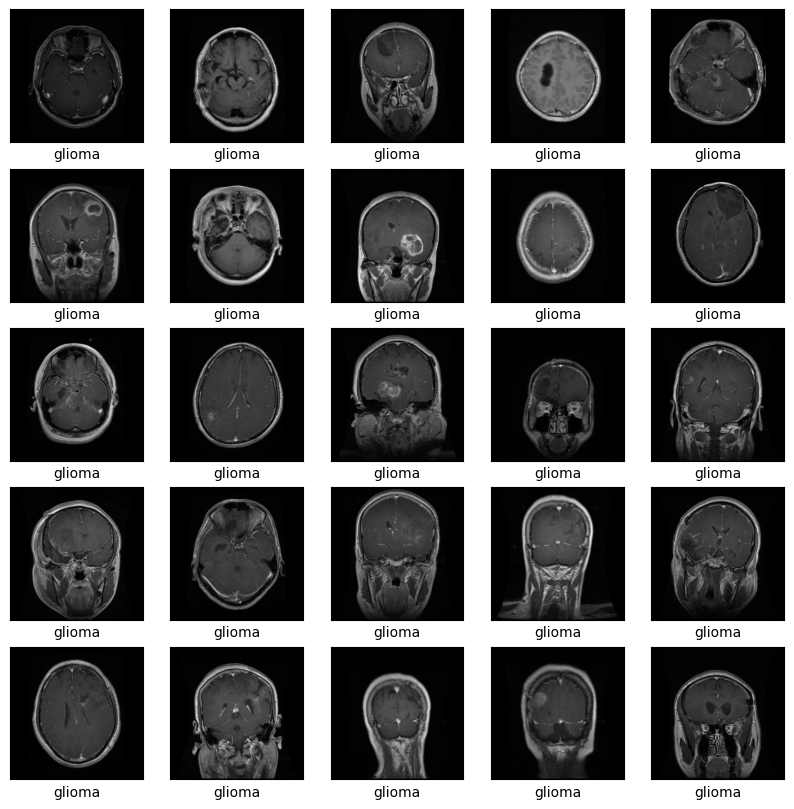

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')

    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# Normalize pixel values to be between 0 and 1
train_images = np.array(train_images) / 255.0
test_images = np.array(test_images) / 255.0


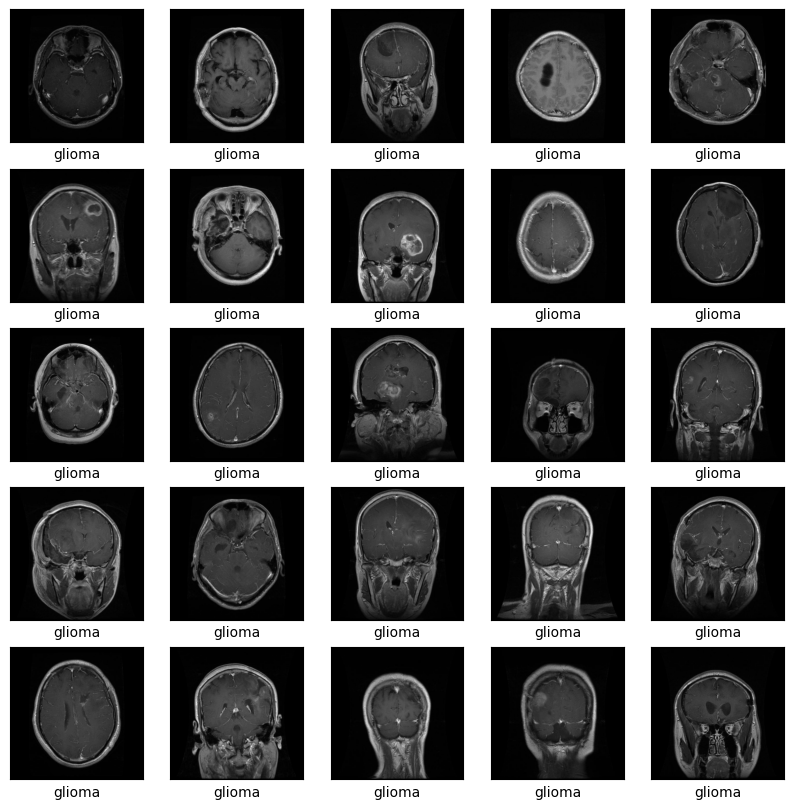

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')

    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
train_images.shape

(5712, 250, 250, 1)

## Estructura y entrenamiento de Red Neuronal Artificial Convolusional (RNAC)
En esta sección se establece la cantidad de capas de convolusión y capas de aprendizaje para nuestra red neuronal artificial convolusional.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 222784)            0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


179/179 [==============================] - 797s 4s/step - loss: 0.6009 - accuracy: 0.7656 - val_loss: 0.3845 - val_accuracy: 0.8619
Epoch 2/10
179/179 [==============================] - 752s 4s/step - loss: 0.2436 - accuracy: 0.9098 - val_loss: 0.3107 - val_accuracy: 0.8886
Epoch 3/10
179/179 [==============================] - 782s 4s/step - loss: 0.0969 - accuracy: 0.9650 - val_loss: 0.1770 - val_accuracy: 0.9489
Epoch 4/10
179/179 [==============================] - 779s 4s/step - loss: 0.0404 - accuracy: 0.9853 - val_loss: 0.1419 - val_accuracy: 0.9550
Epoch 5/10
179/179 [==============================] - 777s 4s/step - loss: 0.0200 - accuracy: 0.9930 - val_loss: 0.1968 - val_accuracy: 0.9466
Epoch 6/10
179/179 [==============================] - 805s 5s/step - loss: 0.0256 - accuracy: 0.9918 - val_loss: 0.1931 - val_accuracy: 0.9489
Epoch 7/10
179/179 [==============================] - 779s 4s/step - loss: 0.0192 - accuracy: 0.9942 - val_loss: 0.1492 - val_accuracy: 0.9641
Epoch 8/10

## Resultados de exactitud de la RNAC
(Explicación)

41/41 - 44s - loss: 0.2761 - accuracy: 0.9451 - 44s/epoch - 1s/step


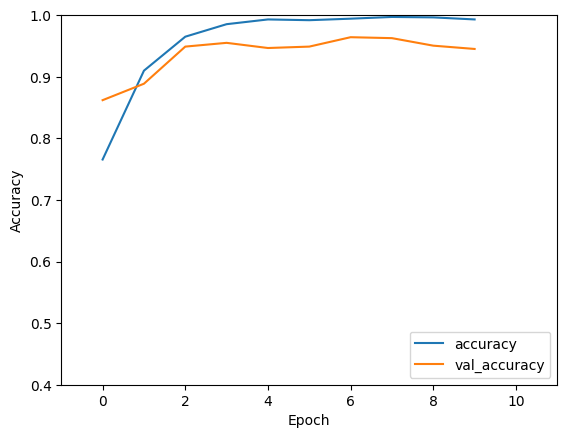

In [ ]:
#Gráfica con la diferencia de valores de exactitud del entrenamiento y la validación.

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.xlim([-1, 11])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.9450801014900208


## Predicciones con la RNAC entrenada.
Se muestran al menos 3 predicciones de dígitos del 0 al 9.

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
results = probability_model.predict(test_images)

41/41 [==============================] - 46s 1s/step


In [ ]:
results[3]


array([0.4718874 , 0.177267  , 0.17542276, 0.17542276], dtype=float32)

In [ ]:
print( test_labels[3] )

0


In [ ]:
results[450]

array([0.17487796, 0.4753652 , 0.17487824, 0.17487858], dtype=float32)

In [ ]:
print( test_labels[450] )

1


In [ ]:
results[700]

array([0.1748778 , 0.17487808, 0.47536626, 0.17487784], dtype=float32)

In [ ]:
print( test_labels[700] )

2


In [ ]:
results[1200]

array([0.17487969, 0.17488624, 0.17487969, 0.47535437], dtype=float32)

In [ ]:
print( test_labels[1200] )

3


### Otra forma

In [ ]:
predictions = model.predict(test_images)

41/41 [==============================] - 43s 1s/step


In [ ]:
x = predictions[1]
y = test_labels[1]
print( x )
print( y )

[9.9999994e-01 3.0443020e-11 5.3646004e-13 5.9935834e-11]
0


In [ ]:
x = predictions[666]
y = test_labels[666]
print( x )
print( y )

[4.8481350e-15 7.7976683e-16 9.9999994e-01 1.5259525e-11]
2


In [ ]:
x = predictions[321]
y = test_labels[321]
print( x )
print( y )

[6.6049829e-02 9.3031871e-01 6.0329080e-04 3.0280391e-03]
1


In [ ]:
x = predictions[1234]
y = test_labels[1234]
print( x )
print( y )

[1.8491592e-08 2.6119562e-06 7.5898390e-07 9.9999660e-01]
3


## Referencias
https://www.tensorflow.org/tutorials/keras/classification?hl=es-419

https://www.tensorflow.org/tutorials/images/cnn?hl=es-419

https://keras.io/api/datasets/mnist/